In [1]:
from m1_xgb import *
from src.conf.configuration import regress_conf


In [2]:
# 输入数据为dataframe格式
train_sample_df = pd.read_csv('../data/dataset/traning_sample.csv')
# print(train_sample_df.head())
train_dataset_df = train_sample_df[['alpha_1','alpha_2','alpha_3','alpha_4','alpha_5',
                                    'alpha_6','alpha_7','alpha_8','alpha_9','alpha_10']]
label_dataset_df = train_sample_df[['dx_2']]
x_train, x_test, y_train, y_test = train_test_sp(train_dataset_df[:30000], label_dataset_df[:30000])
#     print('x_train_pre: %s' % x_train.head())
#     print('y_train_pre: %s' % y_train.head())
#     print('x_test_pre: %s' % x_test.head())
#     print('y_test_pre: %s' % y_test.head())

# 数据统计用
# x_test.to_csv('../result/x_test_{}.csv'.format(now), index=0)
# y_test.to_csv('../result/y_test_{}.csv'.format(now), index=0)


# 模型训练
regress_conf.xgb_config_r()
# print(regress_conf.params)

In [3]:
print(x_train.head())
print(y_train.head())

    alpha_1   alpha_2   alpha_3  alpha_4   alpha_5   alpha_6   alpha_7   alpha_8       alpha_9  alpha_10
0 -0.349339 -0.413679  0.722923      1.0 -0.634745 -0.156349  0.389836 -0.006949  4.415957e-10  0.913370
1 -0.160266 -1.755556 -0.230000     -1.0 -0.839403 -0.656665  0.441638 -0.410613 -3.013363e-08  0.973397
2  0.653265 -1.881034  0.000000      1.0  0.250000 -0.156349  0.569554 -0.263424 -5.507981e-10  0.811733
3 -0.735000  0.409091 -0.198946     -1.0 -0.911765 -0.656665  0.087129 -0.468099  5.379824e-10  0.371078
4 -0.494135  0.424578 -0.200518      1.0 -0.514496 -0.656665  0.537650 -0.394188  1.738817e-09  0.225784
       dx_2
0 -0.054158
1 -0.016629
2 -0.032833
3 -0.019961
4  0.018079


In [4]:
regress_conf.xgb_config_r()
regress_conf.cv_folds = None
regress_conf.early_stop_round = 10
print(regress_conf.params)
print(regress_conf.cv_folds)
print(regress_conf.early_stop_round)
tic = time.time()
data_message = 'X_train.shape={}, X_test.shape = {}'.format(np.shape(x_train), np.shape(y_train))
print(data_message)
xgb = XGBooster(regress_conf)
best_score, best_round, cv_rounds, best_model = xgb.fit(x_train, y_train)
print('Training time cost {}s'.format(time.time() - tic))

{'booster': 'dart', 'learning_rate': 0.01, 'max_depth': 27, 'eta': 0.01, 'silent': 1, 'objective': 'reg:linear', 'eval_metric': 'rmse'}
None
10
X_train.shape=(29400, 10), X_test.shape = (29400, 1)
non_cross_validation。。。。
[0]	train-rmse:0.498428	valid-rmse:0.499876
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 10 rounds.
[1]	train-rmse:0.493473	valid-rmse:0.494987
[2]	train-rmse:0.488568	valid-rmse:0.490148
[3]	train-rmse:0.483713	valid-rmse:0.485358
[4]	train-rmse:0.478906	valid-rmse:0.480616
[5]	train-rmse:0.474147	valid-rmse:0.475922
[6]	train-rmse:0.469437	valid-rmse:0.471271
[7]	train-rmse:0.464773	valid-rmse:0.466676
[8]	train-rmse:0.460157	valid-rmse:0.462128
[9]	train-rmse:0.455587	valid-rmse:0.457625
spend time :0.10557889938354492(s)
Training time cost 0.1063089370727539s


X_train.shape=(29400, 10), X_test.shape = (500, 10)
non_cross_validation。。。。
[0]	train-rmse:0.498428	valid-rmse:0.499876
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 2 rounds.
[1]	train-rmse:0.493473	valid-rmse:0.494987
[2]	train-rmse:0.488568	valid-rmse:0.490148
[3]	train-rmse:0.483713	valid-rmse:0.485358
[4]	train-rmse:0.478906	valid-rmse:0.480616
[5]	train-rmse:0.474147	valid-rmse:0.475922
[6]	train-rmse:0.469437	valid-rmse:0.471271
[7]	train-rmse:0.464773	valid-rmse:0.466676
[8]	train-rmse:0.460157	valid-rmse:0.462128
[9]	train-rmse:0.455587	valid-rmse:0.457625
spend time :0.08590507507324219(s)
Training time cost 0.0864419937133789s
best_score = 0.457625, best_round = 9
rmse_of_pred: 0.4412276382666733
r_square_of_pred: -369.0502958137197
r_square_of_pred: -369.05029581371963
pred [0.45302054 0.4533273  0.4533273  0.4533273  0.45302054 0.45302054
 0.45302054 0.45302054 0.45302054 0.4544993  0.

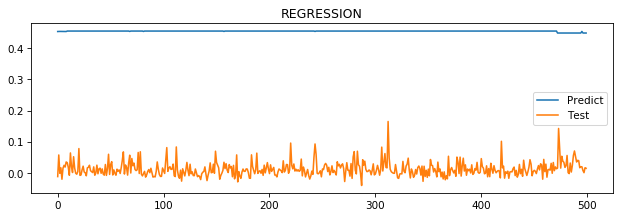

CPU times: user 1.04 s, sys: 459 ms, total: 1.49 s
Wall time: 233 ms


In [5]:
%%time
run_cv(x_train.values, x_test.values, y_train.values, y_test.values)

In [6]:
import pandas as pd

a = pd.DataFrame({'a':[1,1,1, 2, 3], 'b':[2,None,2, 3, 4], })

In [7]:
a

,a,b
0,1,2.0
1,1,NaN
2,1,2.0
3,2,3.0
4,3,4.0


In [8]:
a.describe()

,a,b
count,5.000000,4.000000
mean,1.600000,2.750000
std,0.894427,0.957427
min,1.000000,2.000000
25%,1.000000,2.000000
50%,1.000000,2.500000
75%,2.000000,3.250000
max,3.000000,4.000000
